<a href="https://colab.research.google.com/github/Gur07/SIH_2024/blob/main/Prototype.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.1/872.1 kB 23.8 MB/s eta 0:00:00



0: 640x640 11 cars, 2 truck-l-s, 1 truck-m-, 16.3ms
Speed: 2.7ms preprocess, 16.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Number of cars detected: 11


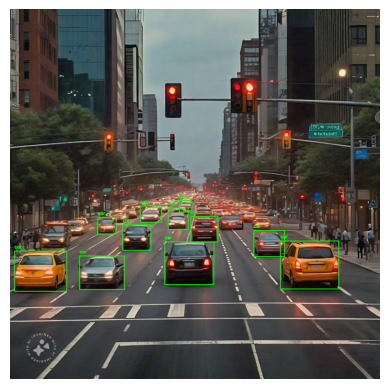

In [4]:

from ultralytics import YOLO
import torch
import cv2
import matplotlib.pyplot as plt

model = YOLO("/content/best (1).pt")

image_path = '/content/trafic.jpg'
image = cv2.imread(image_path)

results = model(image)

count = 0

for result in results:
    for box in result.boxes:
        class_id = int(box.cls.item())
        label = result.names[class_id]

        if label == 'car':
            count += 1

            x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())  # Convert tensor to list and then to int
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
print(f"Number of cars detected: {count}")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis('off')
plt.show()

